# Plotting with AI
---

#### We will use the chatbot to write code that helps us plot data. In this IPython Notebook, we can see a new click button "Generate" that behaves as the hot-key `Ctrl + I`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Box plots
---

#### I prompted the chatbot to write the code below that makes data that could serve as a good example to make box plots as a data visualization.

In [2]:
# generate example data suitable for box plots
np.random.seed(42)

groups = ['Control', 'Treatment A', 'Treatment B', 'Treatment C']
sizes = [120, 100, 140, 90]

rows = []
for grp, n in zip(groups, sizes):
    if grp == 'Control':
        vals = np.random.normal(loc=50, scale=5, size=n)
        # add a few high outliers
        vals = np.concatenate([vals, np.random.choice([80, 85, 90], size=max(1, int(n * 0.02)))])
    elif grp == 'Treatment A':
        vals = np.random.normal(loc=55, scale=7, size=n)
    elif grp == 'Treatment B':
        # skewed distribution to illustrate asymmetry
        vals = np.random.lognormal(mean=3.9, sigma=0.25, size=n)
    else:  # Treatment C
        vals = np.random.normal(loc=48, scale=10, size=n)
        # add a few low outliers
        vals = np.concatenate([vals, np.random.choice([5, 10, 15], size=max(1, int(n * 0.03)))])

    rows.extend([(grp, float(v)) for v in vals])

box_df = pd.DataFrame(rows, columns=['Group', 'Value'])

In [ ]:
# Plot a box plot using seaborn
# Ask the AI chatbot to help write this code




## Scatter plots
---

#### I prompted the chatbot to write the code below that makes data that could serve as a good example to make scattter plots as a data visualization. We will use AI to refine an initial plot such that a best fit line is given and the Pearson R correlation statistic is calculated.

In [10]:
# generate scatterplot-ready data with a clear positive correlation
np.random.seed(2026)

n_scatter = 200
x = np.random.uniform(0, 100, size=n_scatter)
noise = np.random.normal(scale=12, size=n_scatter)  # moderate noise
y = 0.6 * x + 5 + noise  # linear relationship with noise

scatter_df = pd.DataFrame({'X': x, 'Y': y})
# optional categorical grouping for color/shape in plots
scatter_df['Group'] = pd.qcut(scatter_df['X'], q=3, labels=['Low', 'Mid', 'High'])

# quick correlation check
pearson_r = np.corrcoef(scatter_df['X'], scatter_df['Y'])[0, 1]
print(f'Generated {n_scatter} points — Pearson r = {pearson_r:.3f}')

# scatter_df is ready for plotting (columns: X, Y, Group)

Generated 200 points — Pearson r = 0.819


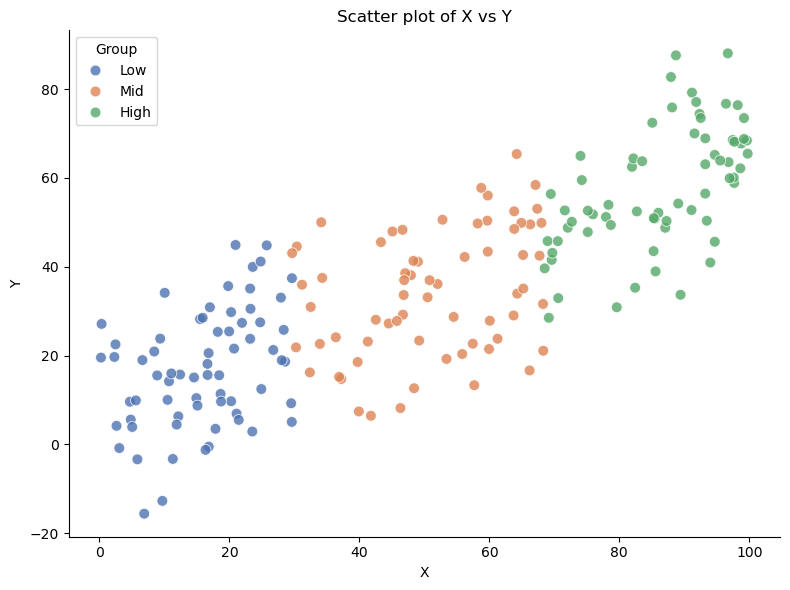

In [11]:
# Scatter plot (no correlation measure, no best-fit line)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=scatter_df, x='X', y='Y', hue='Group', palette='deep', s=60, alpha=0.8, ax=ax)

ax.set_title('Scatter plot of X vs Y')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(title='Group')
sns.despine()
plt.tight_layout()
plt.show()

#### Okay, there is no reason for the colored Groups in this simulated data. So, we will refine our scatter plot by ignoring that variable. We also would like to see a best fit trend line in the plot and the Pearson R correlation coefficient stated somewhere. 

In [3]:
# Make a scatter plot with best fit line and Pearson R and no colored Groups


## Bar plots
---

#### I prompted the chatbot to write the code below that makes data that could serve as a good example to make bar plots as a data visualization. We will use AI to refine an initial plot that is difficult to read.

In [6]:
# generate example data for bar plots (grouped bars with error bars)
np.random.seed(2025)

categories = ['Score', 'SuccessRate']
n_per_group = 120

# define plausible parameters per group (kept comparable for clear bars)
params = {
    'Control':     {'score_mu': 50, 'score_sigma': 5, 'p_success': 0.42},
    'Treatment A': {'score_mu': 56, 'score_sigma': 6, 'p_success': 0.56},
    'Treatment B': {'score_mu': 48, 'score_sigma': 8, 'p_success': 0.62},
    'Treatment C': {'score_mu': 52, 'score_sigma': 7, 'p_success': 0.50},
}

rows = []
for grp in groups:  # reuse existing `groups` list from the notebook
    p = params[grp]
    # continuous "Score" metric
    scores = np.random.normal(loc=p['score_mu'], scale=p['score_sigma'], size=n_per_group)
    # binary "SuccessRate" per-observation (0/1), later averaged per group
    successes = np.random.binomial(n=1, p=p['p_success'], size=n_per_group)

    rows.extend([{'Group': grp, 'Category': 'Score', 'Value': float(s)} for s in scores])
    rows.extend([{'Group': grp, 'Category': 'SuccessRate', 'Value': float(s)} for s in successes])

bar_df = pd.DataFrame(rows)  # long-form dataframe suitable for seaborn barplot

# summary stats for plotting with error bars (mean ± 95% CI)
summary = (
    bar_df
    .groupby(['Group', 'Category'])['Value']
    .agg(['mean', 'std', 'count'])
    .reset_index()
)
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['ci95'] = 1.96 * summary['sem']

bar_summary = summary.rename(columns={'mean': 'Mean', 'std': 'Std', 'count': 'N'})

# pivoted table for grouped bar plots (optional convenience)
bar_pivot = bar_summary.pivot(index='Group', columns='Category', values='Mean').reset_index()

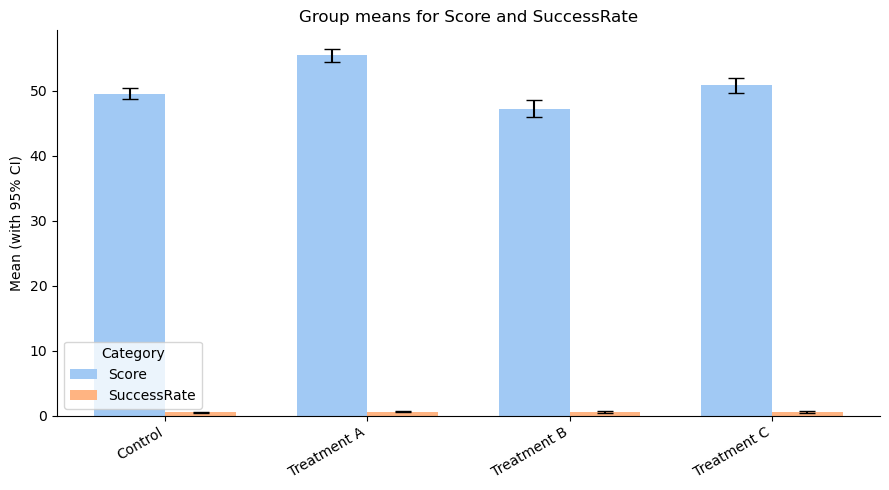

In [7]:
# Plot a bar plot using seaborn
# Ask the AI chatbot to help write this code

# grouped bar plot with 95% CI error bars using bar_pivot and bar_summary
ci_df = bar_summary.pivot(index='Group', columns='Category', values='ci95').reindex(bar_pivot['Group']).reset_index(drop=True)

means_score = bar_pivot['Score'].values
means_sr = bar_pivot['SuccessRate'].values
ci_score = ci_df['Score'].values
ci_sr = ci_df['SuccessRate'].values

x = np.arange(len(bar_pivot['Group']))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x - width/2, means_score, width, yerr=ci_score, capsize=6, label='Score', color=sns.color_palette("pastel")[0])
ax.bar(x + width/2, means_sr, width, yerr=ci_sr, capsize=6, label='SuccessRate', color=sns.color_palette("pastel")[1])

ax.set_xticks(x)
ax.set_xticklabels(bar_pivot['Group'], rotation=30, ha='right')
ax.set_ylabel('Mean (with 95% CI)')
ax.set_title('Group means for Score and SuccessRate')
ax.legend(title='Category')
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

#### I don't like the initial plot. Let's ask the chatbot to plot Score and SuccessRate on separate plots. 

In [2]:
# Make a bar plot for the Score metric separately


In [1]:
# Make a bar plot for the SuccessRate metric separately
